## Methods

Classification decision trees are a great tool for helping you figure out information about a topic. Let's use the game 20 questions as an example. Say I ask you to guess what food I am thinking of. The food I've selected is gummy worms. We can use a series of yes or no questions to figure out what I've selected. You could ask if it is a healthy food, to which my answer would be no. You could ask if it was protein, I'd say no. You could ask if it was a carb, I'd say yes. You could ask if it was sweet, I'd say yes. You could ask if there is dairy in it, I'd say no. You can ask if it was a candy, I'd say yes. And so on until you finally ask if I selected gummy worms, to which I'd say yes. 

The appeal of decision trees is their ability to make the identification process very simple. Each question you ask helps to narrow down the number of possibilities. We can think of it as a visual flowchart that categorizes items based on their features. Going back to our previous example, we can classify foods based on their flavour profile or nutritional category. As we ask more questions, we will eventually get to our gummy worms. 

Making an effective decision tree involves initially posing questions that will reveal the most amount of information about the object's group. We want to figure out distinctive information as fast as possible, so we can distinguish between the groups. Decision trees have applications in many different fields, ranging from sorting out spam emails to diagnosing medical conditions. They are a tool that streamlines intricate decision-making by breaking it down into a sequence of straightforward choices.


## Class distribution

In [63]:
#| code-fold: true
import pandas as pd
import numpy as np 
import sklearn.tree
import sklearn.model_selection
file_path = "../../../../data/01-modified-data/injury_prevention_data_soccer.csv"
soccer_injuries = pd.read_csv(file_path)

label_dist = soccer_injuries["Number of Injuries"].value_counts()
label_dist = label_dist.sort_index()
print("DISTRIBUTION OF LABELS:")
print(label_dist)

DISTRIBUTION OF LABELS:
Number of Injuries
0     22
1     41
2     42
3     15
4     11
5      3
6      2
7      2
10     1
Name: count, dtype: int64


/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Count per Number of Injuries')

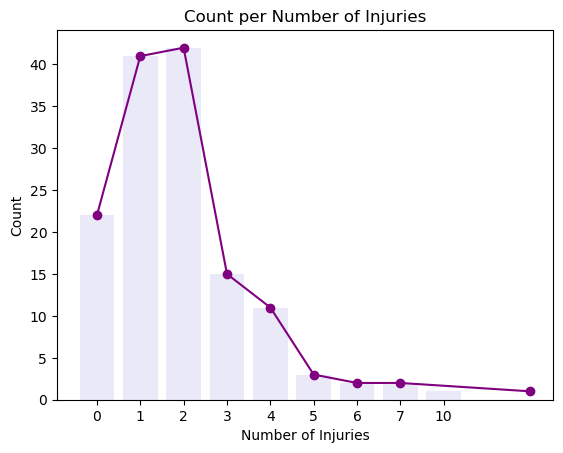

In [64]:
#| code-fold: true
import seaborn as sns 
import matplotlib.pyplot as plt

sns.barplot(x= label_dist.index, y=label_dist.values, color="lavender")
plt.plot(label_dist.index, label_dist.values, color='purple', marker='o', linestyle='-')
plt.ylabel("Count")
plt.title("Count per Number of Injuries")

([<matplotlib.patches.Wedge at 0x175da9310>,
 [Text(0.966797659815723, 0.5246925623399303, '0 injuries'),
  Text(-0.3775197345008592, 1.0331886807657162, '1 injuries'),
  Text(-0.8720577330038374, -0.6704590295522971, '2 injuries'),
  Text(0.40077272406551884, -1.0243931001549667, '3 injuries'),
  Text(0.9014631001688704, -0.6303683677294802, '4 injuries'),
  Text(1.0528595955870075, -0.3185697286001347, '5 injuries'),
  Text(1.0820679519520409, -0.19781038233195886, '6 injuries'),
  Text(1.0955078094302033, -0.09931082255946361, '7 injuries'),
  Text(1.0997190565076482, -0.024859540501146027, '10 injuries')],
 [Text(0.5273441780813034, 0.2861959430945074, '16%'),
  Text(-0.2059198551822868, 0.5635574622358451, '29%'),
  Text(-0.47566785436572945, -0.36570492521034387, '30%'),
  Text(0.21860330403573755, -0.5587598728118, '11%'),
  Text(0.49170714554665657, -0.3438372914888074, '8%'),
  Text(0.5742870521383676, -0.17376530650916436, '2%'),
  Text(0.5902188828829313, -0.1078965721810684

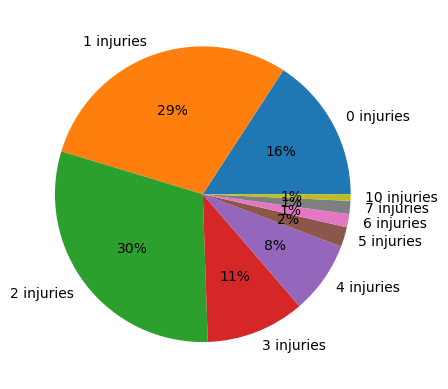

In [65]:
#| code-fold: true
plt.pie(label_dist.values, labels=[f"{count} injuries" for count in label_dist.index], autopct='%.0f%%')

As we can see based on the graphs above, the distribution of number of injuries is skewed to the right as it is much more common for an athlete to have 1 or 2 injuries than any other amount of injuries. This can have a few affects on my classification algorithm results. 

1. Model Bias
    
    Because the 1 injury, 2 injuries, and 0 injuries categories make up 75% of the data, the model may do really well at correctly classifying points in those categories, but less well at correctly categorizing points in the 3, 4, 5, 6, 7, and 10 injuries categories. 

2. Accuracy Scores 

    The accuracy score of the model may not be particularly reliable. Because most of the data points belong to the 0, 1, or 2 injuries classes, the model may predict those classes for all data points which would make the accuracy high but the score wouldn't mean much. 

3. Feature Importance

    An imbalanced dataset may make the model focus more on features that help distinguish the majority classes, rather the features that help distinguish the minority classes. It is important to make sure that all features are being considered during the classification process.


## Baseline model for comparison


In [157]:
#| code-fold: true
soccer_injuries.columns = soccer_injuries.columns.str.strip()
columns_keep = ['Prevention Measure Stretching', 'Prevention Measure Warm Up',
       'Prevention Measure Specific Strength Exercises',
       'Prevention Measure Bracing', 'Prevention Measure Taping',
       'Prevention Measure Shoe Insoles', 'Prevention Measure Face Masks',
       'Prevention Measure Medical Corset', "Number of Injuries"]
df_features = soccer_injuries[columns_keep]

columns_features = ['Prevention Measure Stretching', 'Prevention Measure Warm Up',
       'Prevention Measure Specific Strength Exercises',
       'Prevention Measure Bracing', 'Prevention Measure Taping',
       'Prevention Measure Shoe Insoles', 'Prevention Measure Face Masks',
       'Prevention Measure Medical Corset']
features = soccer_injuries[columns_features]

features.columns = features.columns.str.strip()

import numpy as np
num_obs = len(df_features)
rng = np.random.default_rng(30)
random_guesses = np.random.choice([i for i in range(8)] + [10], num_obs)
df_features["random_guesses"] = random_guesses
df_features

/var/folders/kw/p7j6fdpx3vvgm6c0krhwpvb80000gn/T/ipykernel_64435/2656229809.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features["random_guesses"] = random_guesses


,Prevention Measure Stretching,Prevention Measure Warm Up,Prevention Measure Specific Strength Exercises,Prevention Measure Bracing,Prevention Measure Taping,Prevention Measure Shoe Insoles,Prevention Measure Face Masks,Prevention Measure Medical Corset,Number of Injuries,random_guesses
0,yes,no,yes,no,no,no,no,no,6,1
1,yes,yes,no,no,no,no,no,no,2,5
2,yes,no,no,no,no,yes,no,no,7,6
3,yes,yes,yes,no,no,no,no,no,1,7
4,yes,yes,no,no,yes,no,no,no,2,4
...,...,...,...,...,...,...,...,...,...,...
134,yes,no,no,no,no,no,no,no,0,6
135,yes,no,no,yes,no,no,no,no,2,3
136,yes,yes,yes,no,yes,no,no,yes,2,6
137,yes,no,no,no,yes,yes,no,no,1,2


In [79]:
#| code-fold: true
from sklearn.metrics import f1_score

f1 = f1_score(df_features["Number of Injuries"], df_features["random_guesses"], average="macro")
print(f"f1 score: {f1}")
print("-------------")
#df_features["random_guesses_correct"] = df_features["Number of Injuries"] == df_features["random_guesses"]
#correct_random_guess_rows = df_features[df_features["random_guesses_correct"] == True]
random_guess_accuracy = len(correct_random_guess_rows) / len(df_features)
print(f"Random guess accuracy: {random_guess_accuracy}")
print("-------------")

f1 score: 0.1098411921329338
-------------
Random guess accuracy: 0.11510791366906475
-------------


The basic, unweighted random classifier has an accuracy of 11.51% which is not high and that is to be expected. Because there is a right skew in the data and points in the 0, 1, and 2 injuries classes make up 75% of the data, a classifier that has a 12.5% chance of assigning each number will not be able to accuracy represent this skew. Let's try again with a random classifier that is weighted the same as the distribution of the labels. 

In [80]:
#| code-fold: true
import numpy as np
num_obs = len(df_features)
rng = np.random.default_rng(30)
choices = [i for i in range(8)] + [10]
weights = [0.16, 0.29, 0.3, 0.11, 0.08, 0.02, 0.01, 0.01, 0.01]
weights /= np.sum(weights)
weights = weights[:len(choices)]
weights_dict = dict(zip(choices, weights))
print(weights_dict)
random_guesses_weighted = rng.choice(choices, num_obs, p=weights)
df_features["random_guesses_weighted"] = random_guesses_weighted
df_features

{0: 0.16161616161616163, 1: 0.29292929292929293, 2: 0.30303030303030304, 3: 0.11111111111111112, 4: 0.08080808080808081, 5: 0.020202020202020204, 6: 0.010101010101010102, 7: 0.010101010101010102, 10: 0.010101010101010102}


/var/folders/kw/p7j6fdpx3vvgm6c0krhwpvb80000gn/T/ipykernel_64435/1441920233.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features["random_guesses_weighted"] = random_guesses_weighted


,Prevention Measure Stretching,Prevention Measure Warm Up,Prevention Measure Specific Strength Exercises,Prevention Measure Bracing,Prevention Measure Taping,Prevention Measure Shoe Insoles,Prevention Measure Face Masks,Prevention Measure Medical Corset,Number of Injuries,random_guesses,random_guesses_weighted
0,yes,no,yes,no,no,no,no,no,6,0,1
1,yes,yes,no,no,no,no,no,no,2,10,1
2,yes,no,no,no,no,yes,no,no,7,7,0
3,yes,yes,yes,no,no,no,no,no,1,5,2
4,yes,yes,no,no,yes,no,no,no,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...
134,yes,no,no,no,no,no,no,no,0,5,0
135,yes,no,no,yes,no,no,no,no,2,10,2
136,yes,yes,yes,no,yes,no,no,yes,2,7,1
137,yes,no,no,no,yes,yes,no,no,1,2,1


In [82]:
#| code-fold: true
f1 = f1_score(df_features["Number of Injuries"], df_features["random_guesses_weighted"], average="macro")
print(f"f1 score: {f1}")
print("-------------")
df_features["random_guesses_weighted_correct"] = df_features["Number of Injuries"] == df_features["random_guesses_weighted"]
correct_random_guess_weighted_rows = df_features[df_features["random_guesses_weighted_correct"] == True]
random_guess_weighted_accuracy = len(correct_random_guess_weighted_rows) / len(df_features)
print(f"Weighted random guess accuracy: {random_guess_weighted_accuracy}")
print("-------------")

f1 score: 0.11044140294140295
-------------
Weighted random guess accuracy: 0.2517985611510791
-------------


/var/folders/kw/p7j6fdpx3vvgm6c0krhwpvb80000gn/T/ipykernel_64435/3744477820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features["random_guesses_weighted_correct"] = df_features["Number of Injuries"] == df_features["random_guesses_weighted"]


When we weight the random choices to match the distribution of our data, it is significantly more accurate with an accuracy rate of 25%. That is a pretty good accuracy rate for random guessing. It is clear that weighting our random guesses to match the distribution helps.

## Feature selection


In [191]:
#| code-fold: true
param_grid = {
    'max_depth': [2,3,4,5,6,7,8],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'min_impurity_decrease': [0.01, 0.02, 0.03, 0.04, 0.05]
}

dtc = sklearn.tree.DecisionTreeClassifier(random_state=5000)

grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_num, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

results = grid_search.cv_results_
param_names = list(param_grid.keys())
param_values = [param_grid[name] for name in param_names]

/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'max_depth': 5, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 1}


In [200]:
#| code-fold: true
from sklearn.preprocessing import StandardScaler

threshold = 0.05
feature_importances = clf.feature_importances_
selected_features = X_train.columns[feature_importances > threshold]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("Selected Features:", selected_features)
print("Feature Importances:", feature_importances)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

Selected Features: Index(['Prevention Measure Stretching', 'Prevention Measure Warm Up',
       'Prevention Measure Specific Strength Exercises',
       'Prevention Measure Bracing', 'Prevention Measure Taping',
       'Prevention Measure Shoe Insoles'],
      dtype='object')
Feature Importances: [0.14759918 0.22554741 0.23204718 0.10404068 0.19730943 0.08347534
 0.         0.00998078]


/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

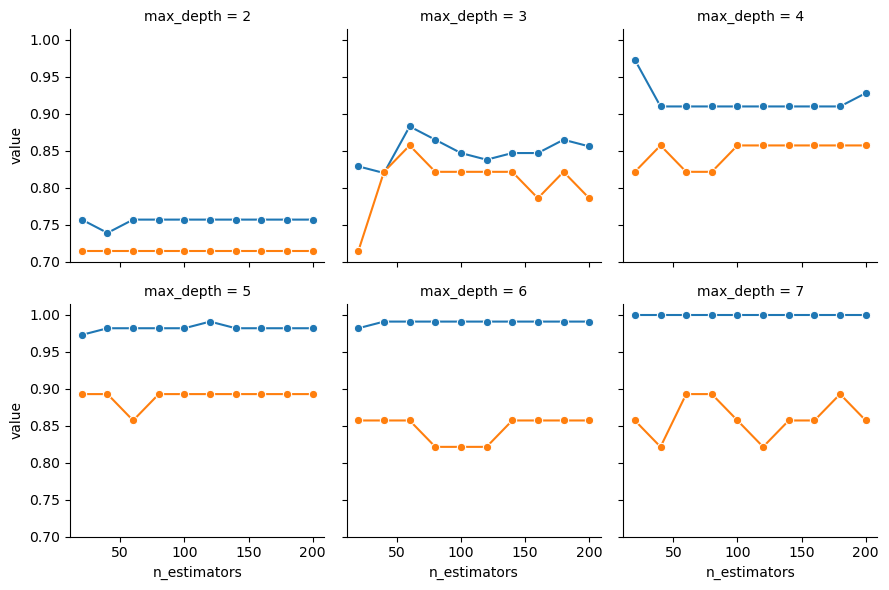

In [202]:
#| code-fold: true
import sklearn.ensemble

def accuracy_over_range(est_range, depth_range, long_format=True):
  result_data = []
  for cur_estimators in est_range:
    for cur_depth in depth_range:
      cur_rfc = sklearn.ensemble.RandomForestClassifier(
        n_estimators = cur_estimators,
        max_depth = cur_depth,
        random_state = 5000
      )
      cur_rfc.fit(X_train_num, y_train)
      y_train_pred_rfc = cur_rfc.predict(X_train_num)
      y_test_pred_rfc = cur_rfc.predict(X_test_num)
      y_train_correct = y_train_pred_rfc == Xy_train["Number of Injuries"]
      y_test_correct = y_test_pred_rfc == Xy_test["Number of Injuries"]
      train_accuracy = sum(y_train_correct) / len(y_train_correct)
      test_accuracy = sum(y_test_correct) / len(y_test_correct)
      cur_result = {
          'n_estimators': cur_estimators,
          'max_depth': cur_depth,
          'train_accuracy': train_accuracy,
          'test_accuracy': test_accuracy
      }
      result_data.append(cur_result)
  rfc_result_df = pd.DataFrame(result_data)
  if long_format:
    rfc_long_df = pd.melt(rfc_result_df, id_vars=['n_estimators','max_depth'])
    return rfc_long_df
  return rfc_result_df

estimators_range = np.arange(20, 220, 20)
depth_range = [2,3,4,5,6,7]
rfc_result_df = accuracy_over_range(estimators_range, depth_range)

import matplotlib.pyplot as plt
import seaborn as sns

def plot_hyperparam_grid(result_df, wrap=3):
  g = sns.FacetGrid(result_df, col="max_depth", col_wrap=wrap)
  g.map_dataframe(sns.lineplot, x="n_estimators", y="value", hue='variable', marker='o')
  plt.show()
plot_hyperparam_grid(rfc_result_df)

When we look at the training and test accuracy for each of our different values for maximum death, we can see that the training accuracy and test accuracy are the highest for max_depth = 5. Therefore we choose that as our value. The other best parameters are calculated as well, with minimum purity decreasing being 0.1 and minimum sample leafs being 1. 

When we perform feature selection we see that the important features are Prevention Measure Stretching, Prevention Measure Warm Up, Prevention Measure Specific Strength Exercises, Prevention Measure Bracing, Prevention Measure Taping, and Prevention Measure Shoe Insoles. Two features were deamed not important, which were medical corsets and face masks, which makes sense as they had very small sample sizes.

/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Training Accuracy: 0.36936936936936937
Testing Accuracy: 0.17857142857142858
Training Precision: 0.14187276977974653
Testing Precision: 0.05952380952380952
Training Recall: 0.1776135741652983
Testing Recall: 0.15306122448979592
Training F1 Score: 0.13615600393520802
Testing F1 Score: 0.08055853920515575


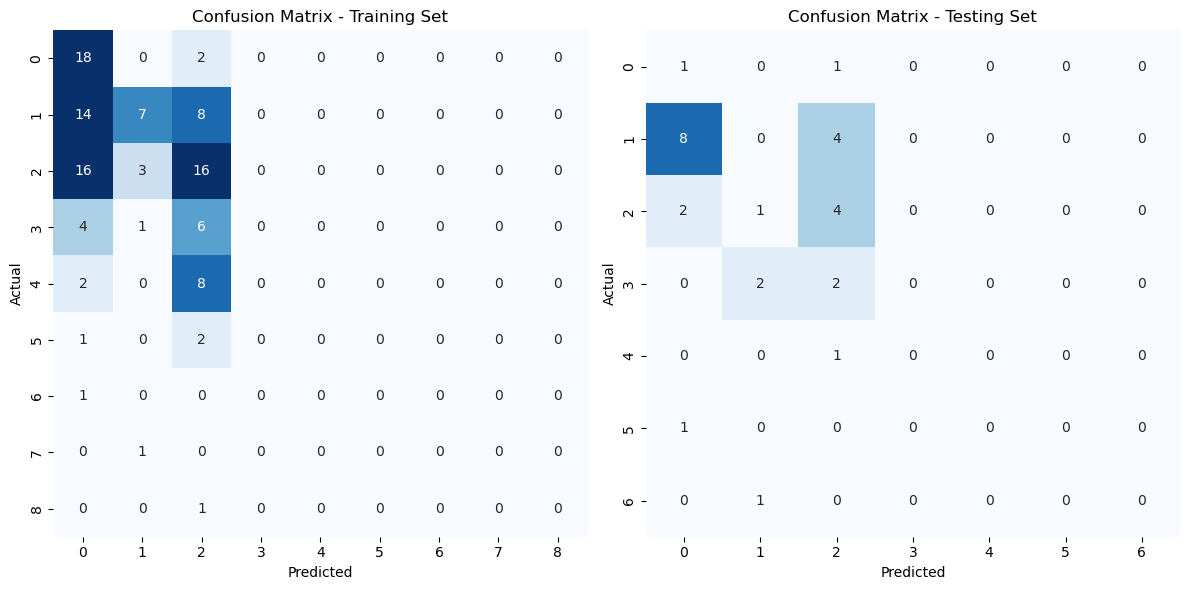

In [234]:
#| code-fold: true
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import sklearn.tree
import sklearn.model_selection
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.tree import plot_tree
import graphviz
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  confusion_matrix

dtc = sklearn.tree.DecisionTreeClassifier(
    max_depth = 6,
    random_state=5000,
    min_samples_leaf=1,
    min_impurity_decrease=0.01
)

dtc.fit(X_train, y_train)

important_features = ['Prevention Measure Stretching', 'Prevention Measure Warm Up',
       'Prevention Measure Specific Strength Exercises',
       'Prevention Measure Bracing', 'Prevention Measure Taping',
       'Prevention Measure Shoe Insoles']

X_df = soccer_injuries[important_features].copy()
X_df = X_df.replace({"yes": 1, "no": 0})
y = soccer_injuries["Number of Injuries"].copy()

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X_df, y, test_size=0.2, random_state=5000
)

y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, average='macro')
test_precision = precision_score(y_test, y_test_pred, average='macro')

train_recall = recall_score(y_train, y_train_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')

train_f1 = f1_score(y_train, y_train_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("Training Precision:", train_precision)
print("Testing Precision:", test_precision)

print("Training Recall:", train_recall)
print("Testing Recall:", test_recall)

print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, vmin=1, vmax=10)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, vmin=1, vmax=10)
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
#| code-fold: true
Xy_train = pd.concat([X_train, y_train], axis=1)
Xy_train['prediction'] = y_train_pred
Xy_test = pd.concat([X_test, y_test], axis=1)
Xy_test['prediction'] = y_test_pred


clf = DecisionTreeClassifier(max_depth=5, random_state=5000)
clf.fit(X_train, y_train)

dot_data = export_graphviz(
    clf, out_file=None,
    feature_names=important_features,
    class_names=[str(i) for i in clf.classes_],
    filled=True, rounded=True
)

graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree", cleanup=True)
graph.view("decision_tree")

![](Screenshot%202023-12-01%20at%209.33.11%20AM.png)

![](Screenshot%202023-12-01%20at%209.36.24%20AM.png)

## Final results

The final results of my decision tree classifier were not very successful. The accuracy of predicting the test data was merely 17.86%, which was less than the accuracy of the weighted random guessing method. The recall, or the number of correctly classified positives out of the total number of correct classifications (both positive and negative), was only 15% on the testing data, and the precision, or the number of correctly classified positives out of the total number of positives (both true and false positives), was only 5.92% on the testing data. These values were higher on the training data, but not by a large amount. In the confusion matricies, we can see that the model did a fair job at predicting points in the 0, 1, and 2 injuries categories but was unable to predict any points correctly for athletes with any amount of injuries over 3. However, that success was not reflected in the test data as there are very few correct predictions.

The fit isn't particularly good, but I think that may be due to the heavily right skewed distribution of the label. With so much of the data falling within the 0, 1, and 2 injuries categories, it makes sense that observations will be incorrectly classified into these categories. Perhaps in the future we can look to taking a smaller subset of the data and focus only on the most used common three or four features to have a more accurate classification. 


## Conclusions:

In my attempt to predict the number of injuries an athlete may have based on what injury prevention methods they  use using a decision tree classifier, the outcome unfortunately was not as successful as I originally hoped it would be. The model's accuracy in predicting test data was a mere 17.86%, even lower than a method that randomly guesses based on the distribution of the data. Because the majority of the athletes in the data set have only had 0, 1, or 2 injuries in their careers so far (this accounts for 75% of the athletes), the classifier may have had a hard time correctly predicting athletes that have had more than 2 injuries. Additionally, because there are so many possible injury prevention methods that they could take, there are many confounding variables and possible combinations of injury prevention methods that may have made accurate classification more difficult. The overall performance leaves much room for improvement. 

For future directions, I think focusing in on the most common injury prevention methods, i.e. stretching, warming up, and strengthening exercises, could lead to more successful classification. Additionally, we could likely also ignore data points where athletes have had 5, 6, 7, or 10 injuries because there are only a few of each of these points. This smaller and more refined data set could help find more accurate results and provide meaningful information about the correlation between injury prevention methods and number of injuries, which would guide athletes in how to properly protect themselves. 